# Organisation du répertoire

Le répertoire est composé de plusieurs dossiers et fichiers :

- Un fichier img, qui contient les images hyperspectrales et les jeux de données
- Un fichier models, qui contient les détails et les poids des modèles entraînés
- Un fichier requirements.yml, contenant les packages python à installer pour faire tourner les scripts
- Deux notebooks, 'Tutorial repo_organisation.ipynb', que vous lisez en ce moment, et <b>'main.ipynb'</b>, qui contient des exemples des scripts à lancer, dans l'ordre, pour faire fonctionner notre code, <b>à consulter en priorité après la lecture de ce notebook</b>
- L'ensemble des scripts python commentés

La plupart de ces composants sont détaillés par la suite

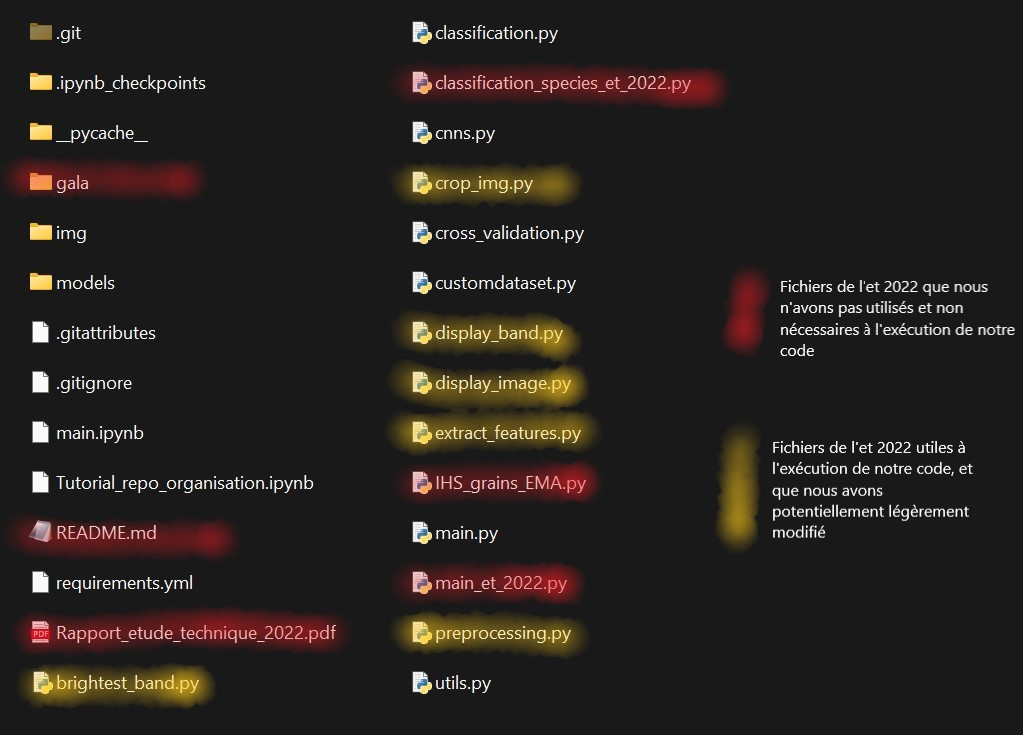

## Fichier requirements

Pour mettre à jour un environnement anaconda avec tous les packages nécessaires, il suffit d'exécuter la commande suivante dans votre invite de commandes :

conda env update --name <nom de l'environnement> -f requirements.yml

## Scripts python

Les fichiers surlignés en rouge et jaune dans l'image ci-dessus datant de l'étude technique 2022, et ayant peu changé dans leur structure et pas du tout dans leur objectif depuis cette dernière, nous n'allons pas les redétailler dans ce tutoriel. 

Les fichiers preprocessing et crop_image restent essentiels pour le prétraitement des données (cf. notebook main.ipynb)

Toutes les fonctions présentes ci-dessous sont commentées plus en détail au sein des scripts

#### main.py

A l'instar du notebook main.ipynb, ce fichier contient des exemples de fonctions d'entraînement prêtes à être lancées. Il peut aider pour mieux avoir connaissance des paramètres des fonctions utilisées, mais n'est pas utile outre mesure et n'a pas vocation à être directement exécuté

#### classification.py

Script central du répertoire, il contient l'ensemble des fonctions permettant de réaliser tous les différents types d'entraînements (hors cross validation) et de tests, ainsi que la sauvegarde des modèles, prédictions et performances dans le dossier 'models'

#### cross_validation.py

Permet de lancer un entraînement en validation croisée, utile pour comparer les performances de différents modèles entre eux

#### cnns.py et customdataset.py

- cnns.py contient l'architecture des différents réseaux de neurones convolutionnels utilisés

- customdataset.py contient la structure de l'outil servant à manipuler les jeux de données durant les entraînements

Ils existent tous deux en support des scripts classification.py et cross_validation.py, et n'ont pas vocation à être appelés à l'extérieur de ces scripts

#### utils.py

Contient un certain nombre de fonctions sans rapport entre elles, qui relèvent principalement de la manipulation / du réarrangement / de la visualisation de données
Cela comprend notamment les fonctions de mélange des données en jeux de train/validation/test, et de visualisation des prédictions sur les images macro

Contrairement aux classes CNN et CustomDataset, la plupart de ces fonctions ne sont pas reprises directement dans les scripts d'entraînement, et doivent être directement exécutées depuis un notebook (cf. notebook 'main.ipynb')

## Dossier img

Contient :
- Le fichier liste_defauts_grains.csv, qui recense les annotations que l'on a effectué à la main sur les 16 images dont nous disposions
- Le dossier large, qui contient toutes les images originales et les fichiers csv liés au pré-traitement de ces dernières
- Le dossier cropped, qui contient les sous-images de grains qui vont être utilisées pour les entraînements, ainsi que les csv des jeux de données

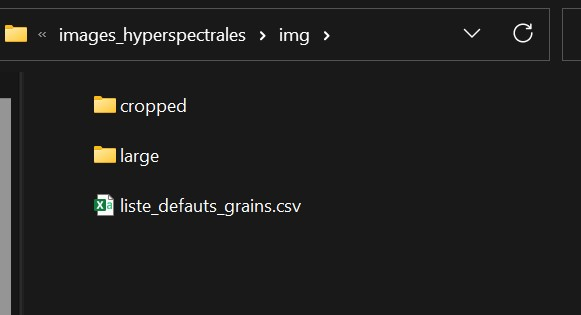

### Liste_defauts_grains.csv

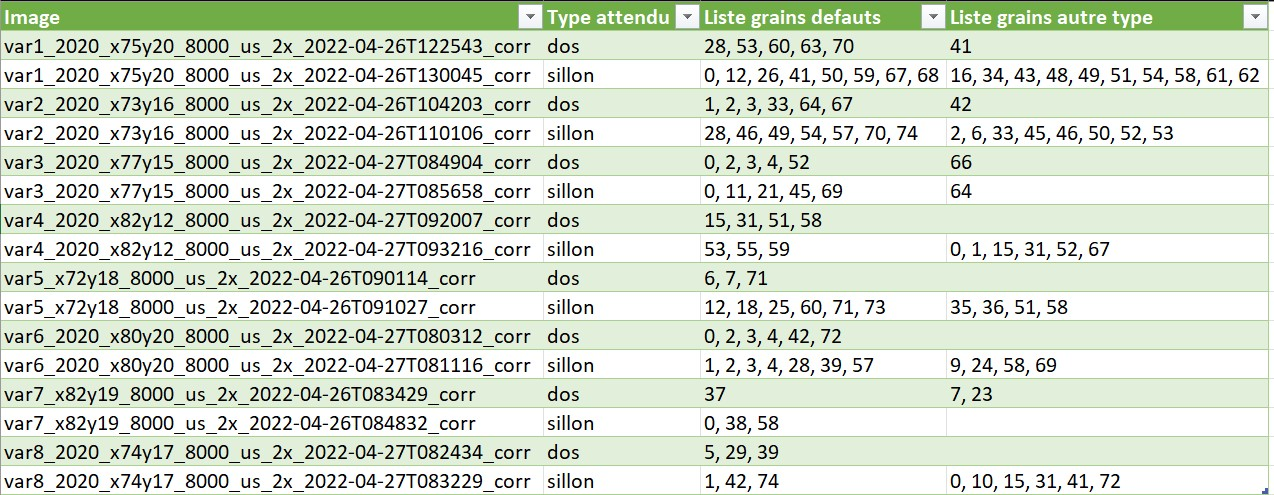

### Dossier large

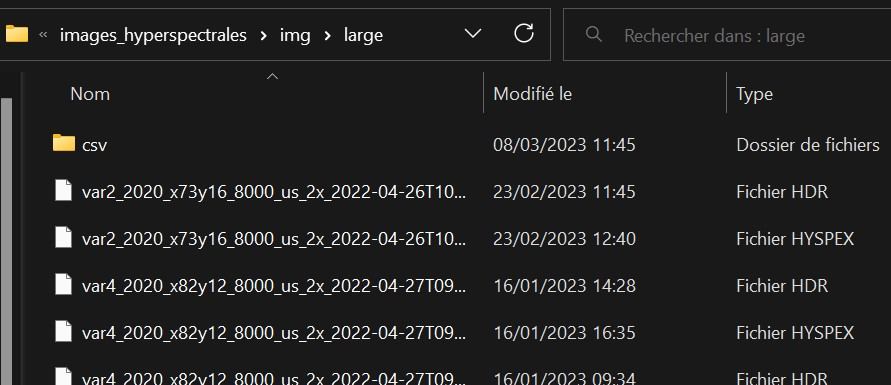

Le dossier csv contient le fichier brightest_bands.csv, ainsi que les fichiers de reflectance de chacune des images, obtenus respectivement après l'exécution des scripts 'retrieve_all_brightest_bands_to_csv' et 'save_reflectance_spectralon', datant de l'e.t. 2022 (cf. main.ipynb)

### Dossier cropped

Contient les dossiers RGB et 216_bands, où figurent les sous-images de grains avec respectivement les bandes RGB ou les 216 bandes, et contient également le jeu de données complet grain par grain 'full_set.csv', <b>qui ne doit pas bouger d'emplacement</b>

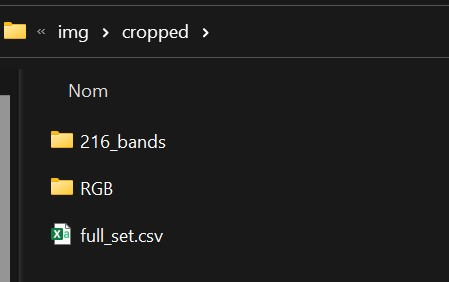

Il est possible de créer des dossiers similaires pour d'autres sélections de bandes : cela se fait lors de l'exécution du script crop_all_images (cf. main.ipynb)

Chaque dossier du type 'RGB' ou '216_bands' est composé d'un fichier 'bands.txt', indiquant selon un formalisme à respecter les bandes utilisées, les données par grain pour chacune des images (fichiers 'annotations_nom_image.csv', créés lors de l'exécution de crop_all_images), ainsi que les jeux de train, test et validation, créés après exécution d'une fonction de mélange du jeu de données complet (cf. main.ipynb)

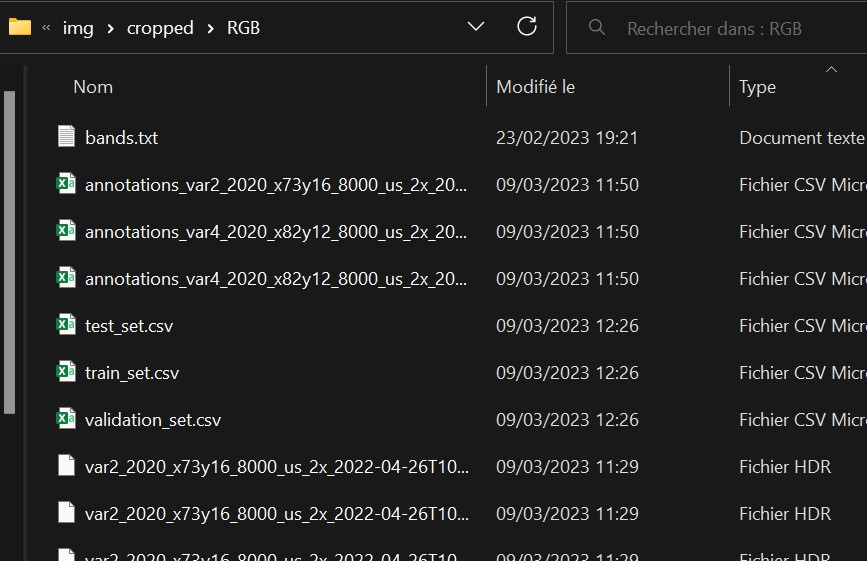

## Dossier models

Le dossier models regroupe l'ensemble des modèles entraînés

Pour chacun d'entre eux, on dispose des informations suivantes (immédiatement disponibles après l'entraînement) :
- Un fichier .pth, qui contient les poids du modèle, et qui peuvent être directement utilisés pour faire des prédictions
- Une figure retraçant l'évolution de l'accuracy et de la perte pendant l'entraînement (On peut retrouver ces valeurs dans les fichiers 'model_values_train_valid.csv' et 'model_values_test.csv')
- Un fichier txt qui résume tous les paramètres du modèle
- Un fichier 'test_preds.csv', qui répertorie les prédictions et la classe attendue pour chaque grain lors de l'exécution du modèle sur le jeu de test
- Le dossier contient aussi les images macro reconstituées avec les prédictions, rajoutées lorsque l'on exécute la fonction see_all_images avec comme paramètres le modèle en question, et en précisant save_figs = True (cf. main.ipynb)

### Meilleurs modèles

Dans la version du répertoire git rendu, nous avons choisi de laisser une grande partie des modèles que nous avons ebtraînés (dont ceux en leave one variety out), mais ceux que nous avons présentés, et pour lesquels nous avons eu nos meilleurs résultats sont les suivants :
- modèle CNN_2_RGB
- modèle CNN_3_1_216